---
title: "Data Science Design Pattern for Student Drop Out"
author: "Microsoft"
output: 
    rmarkdown::html_vignette:
        toc: true

vignette: >
  %\VignetteIndexEntry{Vignette Title}
  %\VignetteEngine{knitr::rmarkdown}
  %\VignetteEncoding{UTF-8}
---

In [1]:

knitr::opts_chunk$set(fig.width = 6,
                      fig.height = 4,
                      fig.align='center',
                      dev = "png")


# Introduction

Welcome to the Data Science Design Pattern for Student Drop Out. This pattern provides a starting point for the data scientist exploring a new dataset. By no means is it the end point of the data science journey. The pattern is under regular revision and improvement and is provided as is.

We now begin with the task of preparing our data for building models using R. 

# Pre-configuration

We load the R packages required for data preparation.

In [2]:
########################################################################
# R SETUP
# Load required packages from local library into R.

library(rattle)       # The normVarNames().
library(readr)        # Modern and efficient data reader.
library(dplyr)        # Wrangling: tbl_df(), group_by(), print(), glimpse().
library(magrittr)     # Pipe operator %>% %<>% %T>% equals().
library(lubridate)    # Dates and time.
library(tidyr)        # Tidy the dataset: gather().
library(stringi)      # String concat operator %s+%.
library(stringr)      # String manipulation: str_replace().
library(randomForest) # Impute missing values with na.roughfix()
library(ggplot2)      # Visualise data.
library(tibble)       # Table data frame: rownames_to_column()

Rattle: A free graphical interface for data mining with R.
Version 4.1.0 Copyright (c) 2006-2015 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'tidyr'

The following object is masked from 'package:magrittr':

    extract

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine


Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



Let's define some utility functions which simplify the coding.

In [3]:
# Useful utility functions.

echo <- function(x, big.mark=",", ...)
{
  format(x, big.mark=big.mark, ...) %>% cat("\n")
}

# Step 1.1: Load - Dataset

We use the studentDropIndia dataset simulated from student data in UCI repository and an India State Government to illustrate our data preparation. Often though we will be loading the dataset from a CSV file and so we illustrate that step first. We begin by identifying the path to the CSV file we wish to load - in this case we load it from a local directory. Then it is a simple matter of reading the data into the memory of the computer, referring to it as variable studentDropIndia.

In [5]:
########################################################################
# DATA INGESTION

# Identify the source location of the dataset.

#dspath <- "/../../Data/studentDropIndia_20161215.csv"
dspath <- file.path("C:/Demo/EducationAnalytics/Data/studentDropIndia_20161215.csv")

# Ingest the dataset.

studentDropIndia <- read_csv(file=dspath)

# Name the dataset.

dsname <- "studentDropIndia"

Parsed with column specification:
cols(
  continue_drop = col_character(),
  student_id = col_character(),
  gender = col_character(),
  caste = col_character(),
  mathematics_marks = col_double(),
  english_marks = col_double(),
  science_marks = col_double(),
  science_teacher = col_integer(),
  languages_teacher = col_integer(),
  guardian = col_character(),
  internet = col_logical(),
  school_id = col_character(),
  total_students = col_integer(),
  total_toilets = col_integer(),
  establishment_year = col_integer()
)


# Step 1.2: Load - Generic Variables

Next, we will store the variable studentDropIndia to a generic variable ds and take a glimpse of it. This will make the following steps somewhat generic and often we can just load a different dataset into ds and these steps can simply be re-run without change. Finally, we save the variable studentDropIndia into a data folder as a .RData file and reload it for testing.

In [6]:
# Prepare the dataset for usage with our template.

ds <- get(dsname)
glimpse(ds)

Observations: 19,100
Variables: 15
$ continue_drop      <chr> "continue", "continue", "continue", "continue", ...
$ student_id         <chr> "s00001", "s00002", "s00003", "s00004", "s00005"...
$ gender             <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F"...
$ caste              <chr> "SC", "BC", "OC", "BC", "OC", "BC", "OC", "OC", ...
$ mathematics_marks  <dbl> 0.409, 0.290, 0.602, 0.378, 0.536, 0.594, 0.177,...
$ english_marks      <dbl> 0.514, 0.512, 0.666, 0.526, 0.614, 0.519, 0.525,...
$ science_marks      <dbl> 0.409, 0.290, 0.602, 0.378, 0.536, 0.594, 0.177,...
$ science_teacher    <int> 6, 4, 4, 8, 9, 4, 6, 2, 2, 8, 8, 2, 0, 1, 0, 3, ...
$ languages_teacher  <int> 0, 7, 2, 7, 4, 8, 7, 9, 2, 10, 6, 2, 4, 6, 3, 12...
$ guardian           <chr> "mother", "mother", "mother", "mother", "other",...
$ internet           <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE,...
$ school_id          <chr> "00310", "00328", "00322", "00305", "00360", "00...
$ total_students 

In [7]:
# Save the dataset to disk as a binary backup if needed.

fpath <- "data"
fname <- file.path(fpath, dsname %s+% ".RData")
if (! dir.exists(fpath)) dir.create(fpath)
save(studentDropIndia, file=fname)

# Remove the original dataset to save on memory.

rm(studentDropIndia)

# Test the loading of the saved dataset and then cleanup.

load(fname) %>% print()

rm(studentDropIndia)

[1] "studentDropIndia"


# Step 2.1: Review - Dataset

We check the dimension and variable information of the dataset. There are 19,100 rows and 15 columns totally in the dataset, which includes variables showing information about student demographic, school attributes, teacher skills and school record in various data types.

In [8]:
########################################################################
# DATA OBSERVATION

# Basic size information.

nrow(ds) %>% echo()
ncol(ds) %>% echo()

19,100 
15 


In [9]:
# A glimpse into the dataset.

glimpse(ds)

Observations: 19,100
Variables: 15
$ continue_drop      <chr> "continue", "continue", "continue", "continue", ...
$ student_id         <chr> "s00001", "s00002", "s00003", "s00004", "s00005"...
$ gender             <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F"...
$ caste              <chr> "SC", "BC", "OC", "BC", "OC", "BC", "OC", "OC", ...
$ mathematics_marks  <dbl> 0.409, 0.290, 0.602, 0.378, 0.536, 0.594, 0.177,...
$ english_marks      <dbl> 0.514, 0.512, 0.666, 0.526, 0.614, 0.519, 0.525,...
$ science_marks      <dbl> 0.409, 0.290, 0.602, 0.378, 0.536, 0.594, 0.177,...
$ science_teacher    <int> 6, 4, 4, 8, 9, 4, 6, 2, 2, 8, 8, 2, 0, 1, 0, 3, ...
$ languages_teacher  <int> 0, 7, 2, 7, 4, 8, 7, 9, 2, 10, 6, 2, 4, 6, 3, 12...
$ guardian           <chr> "mother", "mother", "mother", "mother", "other",...
$ internet           <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE,...
$ school_id          <chr> "00310", "00328", "00322", "00305", "00360", "00...
$ total_students 

# Step 2.2: Review - Meta Data Cleansing

Then we review the variable names and convert them into a standard form using the function normVarNames() from rattle.

In [10]:
########################################################################
# DATA WRANGLING

# Review the variables to optionally normalise their names.

names(ds)

[1] "continue_drop"      "student_id"         "gender"            
 [4] "caste"              "mathematics_marks"  "english_marks"     
 [7] "science_marks"      "science_teacher"    "languages_teacher" 
[10] "guardian"           "internet"           "school_id"         
[13] "total_students"     "total_toilets"      "establishment_year"

In [11]:
# Normalise the variable names.

names(ds) %<>% normVarNames() %T>% print()

 [1] "continue_drop"      "student_id"         "gender"            
 [4] "caste"              "mathematics_marks"  "english_marks"     
 [7] "science_marks"      "science_teacher"    "languages_teacher" 
[10] "guardian"           "internet"           "school_id"         
[13] "total_students"     "total_toilets"      "establishment_year"


In [12]:
# Review the dataset.

glimpse(ds)

Observations: 19,100
Variables: 15
$ continue_drop      <chr> "continue", "continue", "continue", "continue", ...
$ student_id         <chr> "s00001", "s00002", "s00003", "s00004", "s00005"...
$ gender             <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F"...
$ caste              <chr> "SC", "BC", "OC", "BC", "OC", "BC", "OC", "OC", ...
$ mathematics_marks  <dbl> 0.409, 0.290, 0.602, 0.378, 0.536, 0.594, 0.177,...
$ english_marks      <dbl> 0.514, 0.512, 0.666, 0.526, 0.614, 0.519, 0.525,...
$ science_marks      <dbl> 0.409, 0.290, 0.602, 0.378, 0.536, 0.594, 0.177,...
$ science_teacher    <int> 6, 4, 4, 8, 9, 4, 6, 2, 2, 8, 8, 2, 0, 1, 0, 3, ...
$ languages_teacher  <int> 0, 7, 2, 7, 4, 8, 7, 9, 2, 10, 6, 2, 4, 6, 3, 12...
$ guardian           <chr> "mother", "mother", "mother", "mother", "other",...
$ internet           <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE,...
$ school_id          <chr> "00310", "00328", "00322", "00305", "00360", "00...
$ total_students 

# Step 2.3: Review - Observations

Once we have normalized the variable names, the next step is to understand the shape of the dataset. A first look at the sample observations by using head(), tail(), and sample_n() give us an initial understanding of the data.

In [13]:
# Review the first few observations.

head(ds) %>% print.data.frame()

  continue_drop student_id gender caste mathematics_marks english_marks
1      continue     s00001      F    SC             0.409         0.514
2      continue     s00002      F    BC             0.290         0.512
3      continue     s00003      F    OC             0.602         0.666
4      continue     s00004      F    BC             0.378         0.526
5      continue     s00005      F    OC             0.536         0.614
6      continue     s00006      F    BC             0.594         0.519
  science_marks science_teacher languages_teacher guardian internet school_id
1         0.409               6                 0   mother     TRUE     00310
2         0.290               4                 7   mother     TRUE     00328
3         0.602               4                 2   mother    FALSE     00322
4         0.378               8                 7   mother     TRUE     00305
5         0.536               9                 4    other     TRUE     00360
6         0.594             

In [14]:
# Review the last few observations.

tail(ds) %>% print.data.frame()

  continue_drop student_id gender caste mathematics_marks english_marks
1      continue     s19095      M    OC             0.478         0.642
2      continue     s19096      M    OC             0.323         0.429
3      continue     s19097      M    BC             0.633         0.885
4      continue     s19098      M    SC             0.337         0.283
5      continue     s19099      M    BC             0.344         0.351
6      continue     s19100      M    BC             0.183         0.077
  science_marks science_teacher languages_teacher guardian internet school_id
1         0.478               4                 0   father     TRUE     00389
2         0.323               2                 7   mother     TRUE     00320
3         0.633               6                 2   mother     TRUE     00378
4         0.337               2                 6    other     TRUE     00378
5         0.344               6                 0    other     TRUE     00374
6         0.183             

In [15]:
# Review a random sample of observations.

sample_n(ds, size=6) %>% print.data.frame()

  continue_drop student_id gender caste mathematics_marks english_marks
1      continue     s07738      F    OC             0.413         0.831
2      continue     s12151      M    OC             0.611         0.563
3          drop     s12126      M    OC             0.359         0.521
4      continue     s07814      F    SC             0.418         0.496
5      continue     s03637      M    SC             0.257         0.383
6      continue     s12591      M    SC             0.442         0.643
  science_marks science_teacher languages_teacher guardian internet school_id
1         0.413               8                 3   father     TRUE     00365
2         0.611               4                 7   mother    FALSE     00367
3         0.359               2                 7    other     TRUE     00313
4         0.418               2                 6    other     TRUE     00333
5         0.257               7                 7   father     TRUE     00334
6         0.442             

# Step 2.4: Review - Summary

Next, we use summary() to preview the distributions of each variable.

In [16]:
# Traditional dataset summary to get started.

summary(ds)

 continue_drop       student_id           gender             caste          
 Length:19100       Length:19100       Length:19100       Length:19100      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 mathematics_marks english_marks    science_marks    science_teacher
 Min.   :0.0230    Min.   :0.0770   Min.   :0.0230   Min.   :0.000  
 1st Qu.:0.3730    1st Qu.:0.4500   1st Qu.:0.3730   1st Qu.:2.000  
 Median :0.5150    Median :0.5595   Median :0.5150   Median :4.000  
 Mean   :0.5203    Mean   :0.5625   Mean   :0.5203   Mean   :3.982  
 3rd Qu.:0.6740    3rd Qu.:0.6670   3rd

# Step 2.5: Review - Data Formats

Except for the generic data wrangling, we now do data wrangling customized for studentDropIndia. For example, we may need to correct the format of some of the variables in our dataset. We might first check the data type of each variable. Noting that there are categorical variables in the formats of character and integer, we may like to convert them to factor.

In [17]:
####################################
# studentDropIndia data wrangling.

# How many schools are represented in the dataset? (Why we need to know this)

ds$school_id %>% 
  unique() %>%
  length()

[1] 100

In [18]:
# Check the class of all the variables.

ds %>% sapply(class)

continue_drop         student_id             gender              caste 
       "character"        "character"        "character"        "character" 
 mathematics_marks      english_marks      science_marks    science_teacher 
         "numeric"          "numeric"          "numeric"          "integer" 
 languages_teacher           guardian           internet          school_id 
         "integer"        "character"          "logical"        "character" 
    total_students      total_toilets establishment_year 
         "integer"          "integer"          "integer"

In [19]:
# Select all the character variables.

ds %>%
  sapply(is.character) %>%
  which(useNames=TRUE) %>%
  names() %T>% 
  print() ->
vnames

[1] "continue_drop" "student_id"    "gender"        "caste"        
[5] "guardian"      "school_id"    


In [20]:
# Review the values of the variables.

ds[vnames] %>%
  sapply(as.factor) %>%
  summary()

  continue_drop     student_id    gender   caste       guardian    
 continue:18200   s00001 :    1   F:9900   BC:9700   father: 4400  
 drop    :  900   s00002 :    1   M:9200   OC:3000   mixed :  300  
                  s00003 :    1            SC:5350   mother:13600  
                  s00004 :    1            ST:1050   other :  800  
                  s00005 :    1                                    
                  s00006 :    1                                    
                  (Other):19094                                    
   school_id    
 00334  :  571  
 00331  :  516  
 00382  :  470  
 00392  :  469  
 00365  :  444  
 00341  :  430  
 (Other):16200  

In [21]:
# Choose to convert these variables from character to factor.

vnames %<>% setdiff(c("student_id")) %T>% print()

ds[vnames] %<>% 
  lapply(factor) %>% 
  data.frame() %>% 
  tbl_df()

# Confirm they are now factors.

ds[vnames] %>% sapply(class)

[1] "continue_drop" "gender"        "caste"         "guardian"     
[5] "school_id"    


continue_drop        gender         caste      guardian     school_id 
     "factor"      "factor"      "factor"      "factor"      "factor"

In [22]:
# Select all the logical variables.

ds %>%
  sapply(is.logical) %>%
  which(useNames=TRUE) %>%
  names() %T>% 
  print() ->
vnames

[1] "internet"


In [23]:
# Decide to convert these variables from logical to factor.

ds[vnames] %>% head()

internet
TRUE
TRUE
FALSE
TRUE
TRUE
TRUE


In [24]:
ds[vnames] %<>% 
  lapply(factor) %>% 
  data.frame() %>% 
  tbl_df() %T>%
  {head(.) %>% print()}

# A tibble: 6 × 1
  internet
    <fctr>
1     TRUE
2     TRUE
3    FALSE
4     TRUE
5     TRUE
6     TRUE


In [25]:
# Review the distribution of observations across levels.

ds[, sapply(ds, is.factor)] %>% sapply(table)

$continue_drop

continue     drop 
   18200      900 

$gender

   F    M 
9900 9200 

$caste

  BC   OC   SC   ST 
9700 3000 5350 1050 

$guardian

father  mixed mother  other 
  4400    300  13600    800 

$internet

FALSE  TRUE 
 2900 16200 

$school_id

00300 00301 00302 00303 00304 00305 00306 00307 00308 00309 00310 00311 00312 
  198    49   191    28   390   354    72   177    38    28   262   209   257 
00313 00314 00315 00316 00317 00318 00319 00320 00321 00322 00323 00324 00325 
  399   286   280    59    28    54    96   384    35   179   344   170    97 
00326 00327 00328 00329 00330 00331 00332 00333 00334 00335 00336 00337 00338 
  177   251   356   275   125   516    93   335   571    87   206   185   145 
00339 00340 00341 00342 00343 00344 00345 00346 00347 00348 00349 00350 00351 
  245   134   430   295   353   220   143    87    67    80   132    36   251 
00352 00353 00354 00355 00356 00357 00358 00359 00360 00361 00362 00363 00364 
  177   359   184    96   154  

In [26]:
# Note the remaining variables to be dealt with.

sapply(ds, class)

continue_drop         student_id             gender              caste 
          "factor"        "character"           "factor"           "factor" 
 mathematics_marks      english_marks      science_marks    science_teacher 
         "numeric"          "numeric"          "numeric"          "integer" 
 languages_teacher           guardian           internet          school_id 
         "integer"           "factor"           "factor"           "factor" 
    total_students      total_toilets establishment_year 
         "integer"          "integer"          "integer"

In [27]:
vnames <- c("english_marks", "science_marks", "mathematics_marks") 

# Review the values.

head(ds[vnames])
sample_n(ds[vnames], 6)

english_marks,science_marks,mathematics_marks
0.514,0.409,0.409
0.512,0.290,0.290
0.666,0.602,0.602
0.526,0.378,0.378
0.614,0.536,0.536
0.519,0.594,0.594


english_marks,science_marks,mathematics_marks
0.626,0.628,0.628
0.656,0.625,0.625
0.711,0.640,0.640
0.478,0.206,0.206
0.302,0.372,0.372
0.738,0.863,0.863


In [28]:
# Check the current class of the variables.

ds[vnames] %>% sapply(class)

english_marks     science_marks mathematics_marks 
        "numeric"         "numeric"         "numeric"

# Step 2.6: Review - Variable Roles

We are now in a position to identify the roles played by the variables within the dataset. We assign the variable continue_drop which we are going to predict to be our target variable and put it in front of all. We treat the varaibles student_id, and school_id as observation identifiers.

In [29]:
####################################
# Variable Roles

# Note the available variables.

vars <- names(ds) %T>% print()

 [1] "continue_drop"      "student_id"         "gender"            
 [4] "caste"              "mathematics_marks"  "english_marks"     
 [7] "science_marks"      "science_teacher"    "languages_teacher" 
[10] "guardian"           "internet"           "school_id"         
[13] "total_students"     "total_toilets"      "establishment_year"


In [30]:
# Note the target variable.

target <- "continue_drop"

# Place the target variable at the beginning of the vars.

vars <- c(target, vars) %>% unique() %T>% print()

# Note any identifiers.

id <- c("student_id", "school_id")

 [1] "continue_drop"      "student_id"         "gender"            
 [4] "caste"              "mathematics_marks"  "english_marks"     
 [7] "science_marks"      "science_teacher"    "languages_teacher" 
[10] "guardian"           "internet"           "school_id"         
[13] "total_students"     "total_toilets"      "establishment_year"


# Step 3.1: Clean - Ignore IDs, Outputs, Missing

## IDs and Outputs 

We will want to ignore some variables that are irrelevant or inappropriate for modelling as normal predictors. We start with the identifiers and the risk variable (there is no risk variable in this case).

In [31]:
####################################
# Generic data wrangling.

# Initialise ignored variables: identifiers and risk.

ignore <- union(id, if (exists("risk")) risk) %T>% print()

[1] "student_id" "school_id" 


We might also identify any variable that has a unique value for every observation. These are sometimes identifiers as well and if so are candidates for ignoring.

In [32]:
# Heuristic for candidate identifiers to possibly ignore. 

ds[vars] %>%
  sapply(function(x) x %>% unique() %>% length()) %>%
  equals(nrow(ds)) %>%
  which() %>%
  names() %T>%
  print() ->
ids

# Add them if any to the variables to be ignored for modelling.

ignore <- union(ignore, ids) %T>% print()

[1] "student_id"
[1] "student_id" "school_id" 


## All Missing

We then remove any variable where all of the values are missing.

In [33]:
# Identify variables with only missing values.

ds[vars] %>%
  sapply(function(x) x %>% is.na %>% sum) %>%
  equals(nrow(ds)) %>%
  which() %>%
  names() %T>%
  print() ->
missing

# Add them if any to the variables to be ignored for modelling.

ignore <- union(ignore, missing) %T>% print()

character(0)
[1] "student_id" "school_id" 


## Many Missing

Perhaps we also want to ignore variables with more than 70% of the values missing.

In [34]:
# Identify a threshold above which proportion missing is fatal.

missing.threshold <- 0.7

# Identify variables that are mostly missing.

ds[vars] %>%
  sapply(function(x) x %>% is.na() %>% sum()) %>%
  '>'(missing.threshold*nrow(ds)) %>%
  which() %>%
  names() %T>%
  print() ->
mostly

# Add them if any to the variables to be ignored for modelling.

ignore <- union(ignore, mostly) %T>% print()

character(0)
[1] "student_id" "school_id" 


# Step 3.2: Clean - Ignore MultiLevel, Constants

## Too Many Levels

We might also want to ignore variables with too many levels.

In [35]:
# Identify a threshold above which we have too many levels.

levels.threshold <- 20

# Identify variables that have too many levels.

ds[vars] %>%
  sapply(is.factor) %>%
  which() %>%
  names() %>%
  sapply(function(x) ds %>% extract2(x) %>% levels() %>% length()) %>%
  '>='(levels.threshold) %>%
  which() %>%
  names() %T>%
  print() ->
too.many

# Add them if any to the variables to be ignored for modelling.

ignore <- union(ignore, too.many) %T>% print()

[1] "school_id"
[1] "student_id" "school_id" 


## Constants

We ingore variables with constant values as well.

In [36]:
# Identify variables that have a single value.

ds[vars] %>%
  sapply(function(x) all(x == x[1L])) %>%
  which() %>%
  names() %T>%
  print() ->
constants 

# Add them if any to the variables to be ignored for modelling.

ignore <- union(ignore, constants) %T>% print()

character(0)
[1] "student_id" "school_id" 


# Step 3.3: Clean - Ignore Correlated Varaibles

Within all the numeric varaibles, we can identify pairs where we want to keep one but not the other, because they are highly correlated. We will select them manually since it is a judgement call. Normally we might limit the removals to those correlations that are 0.95 or more. In this case, there does not exist a collinearity.

In [37]:
# Note which variables are numeric.

vars %>%
  setdiff(ignore) %>%
  '['(ds, .) %>%
  sapply(is.numeric) %>% 
  which() %>%
  names() %T>%
  print() ->
numc

[1] "mathematics_marks"  "english_marks"      "science_marks"     
[4] "science_teacher"    "languages_teacher"  "total_students"    
[7] "total_toilets"      "establishment_year"


In [38]:
# For the numeric variables generate a table of correlations

ds[numc] %>%
  cor(use="complete.obs") %>%
  ifelse(upper.tri(., diag=TRUE), NA, .) %>% 
  abs %>% 
  data.frame %>%
  tbl_df %>%
  set_colnames(numc) %>%
  mutate(var1=numc) %>% 
  gather(var2, cor, -var1) %>% 
  na.omit %>%
  arrange(-abs(cor)) %T>%
  print() ->
mc

# A tibble: 28 × 3
                 var1              var2        cor
                <chr>             <chr>      <dbl>
1       science_marks mathematics_marks 1.00000000
2       english_marks mathematics_marks 0.54978698
3       science_marks     english_marks 0.54978698
4       total_toilets    total_students 0.30231358
5  establishment_year     total_toilets 0.16805996
6     science_teacher mathematics_marks 0.03872271
7     science_teacher     science_marks 0.03872271
8  establishment_year    total_students 0.03666162
9     science_teacher     english_marks 0.03473078
10  languages_teacher     english_marks 0.02543076
# ... with 18 more rows


In [39]:
# Any variables could be removed because highly correlated?

ignore <- union(ignore, NULL) %T>% print()

[1] "student_id" "school_id" 


# Step 3.4: Clean - Remove the Ignored Variables

Once we have identified the variables to ignore, we remove them from our list of variables to use.

In [40]:
# Check the number of variables currently.

length(vars)

[1] 15

In [41]:
# Remove the variables to ignore.

vars <- setdiff(vars, ignore) %T>% print()

 [1] "continue_drop"      "gender"             "caste"             
 [4] "mathematics_marks"  "english_marks"      "science_marks"     
 [7] "science_teacher"    "languages_teacher"  "guardian"          
[10] "internet"           "total_students"     "total_toilets"     
[13] "establishment_year"


In [42]:
# Confirm they are now ignored.

length(vars)

[1] 13

# Step 3.5: Clean - Feature Selection

The FSelector (Romanski, 2013) package provides functions to identify subsets of variables that might be more effective for modelling. For example, we can use correlation search function cfs() to identify key variables and thus decide which variables to retain.

In [43]:
####################################
# Variable Selection

# Formula for modelling.

form <- formula(target %s+% " ~ .") %T>% print()

continue_drop ~ .


In [44]:
# Use correlation search to identify key variables.
# Could be useful to decide which variables to retain.
# (need FSelector to be loaded)

# cfs(form, ds[vars])

In [45]:
# Any variables to remove because not useful?

vars %<>% setdiff(NULL) %T>% print()

 [1] "continue_drop"      "gender"             "caste"             
 [4] "mathematics_marks"  "english_marks"      "science_marks"     
 [7] "science_teacher"    "languages_teacher"  "guardian"          
[10] "internet"           "total_students"     "total_toilets"     
[13] "establishment_year"


Or, we can use the function information.gain() to identify varaible importance and decide which varaibles to remove.

In [46]:
# Use information gain to identify variable importance.
# (need FSelector to be loaded)

#information.gain(form, ds[vars]) %>%
#  rownames_to_column() %>%
#  arrange(attr_importance)

# Any variables to remove because not useful?

#vars %<>% setdiff(NULL)

# Step 3.6: Clean - Remove Missing Target

In addition to varaibles, sometimes there may be further cleansing with the observations. Here, we remove observations with a missing target first.

In [47]:
####################################
# Continue Wrangling

# Check the dimensions to start with.

dim(ds) %>% echo()

19,100     15 


In [48]:
# Identify observations with a missing target.

ds %>% 
  extract2(target) %>% 
  is.na() %T>%
  {sum(.) %>% print()} ->
missing.target 

[1] 0


In [49]:
# Remove observations with a missing target.

ds %<>% filter(!missing.target)

# Confirm the filter delivered the expected dataset.

dim(ds) %>% echo()

19,100     15 


# Step 3.7: Clean - Deal with Missing Values

To clean observatons with missing predictors, we can impute missing values in the data by using na.roughfix() from package randomForest (Breiman et al, 2012).

In [50]:
####################################
## Optional missing value imputation.

# Count the number of missing values.

ds[vars] %>%  is.na() %>% sum() %>% echo()

676 


In [51]:
# Impute missing values.

ds[vars] %<>% na.roughfix()

In [52]:
# Confirm that no missing values remain.

ds[vars] %>%  is.na() %>% sum() %>% echo()

0 


Alternatively, we can simply remove observations that have missing values. Here na.omit() identifies the rows to omit based on the vars to be included for modelling. This list of rows to omit is stored as the na.action attribute of the returned object. We then remove these observations from the dataset.

In [53]:
####################################
# Optional remove observations with missing values.

# Initialise the list of observations to be removed.

omit <- NULL

# Review the current dataset.

ds[vars] %>% nrow() %>% echo()
ds[vars] %>% is.na() %>% sum() %>% echo()

19,100 
0 


In [54]:
# Identify any observations with missing values.

ds[vars] %>%
  na.omit() %>%
  attr("na.action") %T>%
  print() ->
mo

NULL


In [55]:
# Record the observations to omit.

omit <- union(omit, mo) %T>% {length(.) %>% print()}

[1] 0


In [56]:
# If there are observations to omit then remove them.

if (length(omit)) ds <- ds[-omit,]

# Confirm the observations have been removed.

ds[vars] %>% nrow() %>% echo()
ds[vars] %>% is.na() %>% sum() %>% echo()

19,100 
0 


# Step 3.8: Clean - Normalise Factors

Some variables will have levels with spaces, and mixture of cases, etc. We may like to normalise the levels for each of the categoric variables.

In [57]:
####################################
# Normalise factors.

# Note which variables are categoric.

ds[vars] %>%
  sapply(is.factor) %>%
  which() %>%
  names() %T>%
  print() ->
catc

[1] "continue_drop" "gender"        "caste"         "guardian"     
[5] "internet"     


In [58]:
# Check the levels.

ds[catc] %>% sapply(levels)

$continue_drop
[1] "continue" "drop"    

$gender
[1] "F" "M"

$caste
[1] "BC" "OC" "SC" "ST"

$guardian
[1] "father" "mixed"  "mother" "other" 

$internet
[1] "FALSE" "TRUE"

In [59]:
# Normalise the levels of all categoric variables.

for (v in catc) 
  levels(ds[[v]]) %<>% normVarNames()

# Review the levels.

ds[catc] %>% sapply(levels)

$continue_drop
[1] "continue" "drop"    

$gender
[1] "f" "m"

$caste
[1] "bc" "oc" "sc" "st"

$guardian
[1] "father" "mixed"  "mother" "other" 

$internet
[1] "false" "true"

# Step 3.9: Clean - Ensure Target is Numeric

For classification models, we want to ensure the target is factor.

In [60]:
# Ensure the target is factor.

class(ds[[target]])

ds[[target]] %<>% as.factor()

# Confirm the distribution.

ds[target] %>% summary()

[1] "factor"

  continue_drop  
 continue:18200  
 drop    :  900  

Here, we visualise the distribution of the target variable using ggplot2.

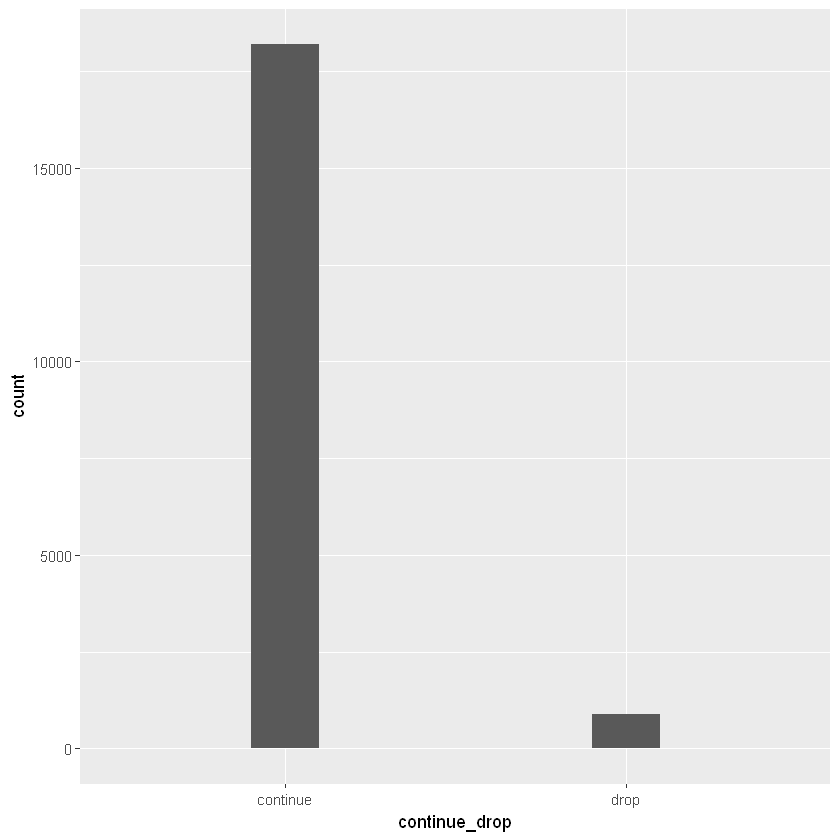

In [61]:
p <- ggplot(ds, aes_string(x=target))
p <- p + geom_bar(width=0.2)
print(p)

# Step 4.1: Prepare - Variable

We are now ready to identify the variables that we will use to build the model. Previously we identified the variable roles. Now we identify those that we wish to model. We begin with the model input variables, identifying them as a vector of characters (the variable name) and a vector of integers (the variable index).

In [62]:
########################################################################
# VARIABLE ROLES

# Identify the input variables by name.

inputs <- setdiff(vars, target) %T>% print()

 [1] "gender"             "caste"              "mathematics_marks" 
 [4] "english_marks"      "science_marks"      "science_teacher"   
 [7] "languages_teacher"  "guardian"           "internet"          
[10] "total_students"     "total_toilets"      "establishment_year"


In [63]:
# Identify the input variables by index.

inputi <- sapply(inputs, 
                 function(x) which(x == names(ds)), 
                 USE.NAMES=FALSE) %T>% print()

 [1]  3  4  5  6  7  8  9 10 11 13 14 15


For convenience we record the number of observations.

In [64]:
nobs <- nrow(ds) %T>% echo()

19,100 


Here we simply report on the dimensions of various data subsets.

In [65]:
# Confirm various subset sizes.

dim(ds) %>% echo()
dim(ds[vars]) %>% echo()
dim(ds[inputs]) %>% echo()
dim(ds[inputi]) %>% echo()

19,100     15 
19,100     13 
19,100     12 
19,100     12 


# Step 4.2: Prepare - Numeric and Categoric Variables

Sometimes we need to identify the numeric and categoric variables. Many cluster analysis algorithms only deal with numeric variables, for example. Here we identify them both by name and by index. Note that when using the index we have to assume the variables always remain in the same order within the dataset and all variables are present. Otherwise the indicies will get out of sync.

In [66]:
# Identify the numeric variables by index.

ds %>%
  sapply(is.numeric) %>%
  which() %>%
  intersect(inputi) %T>%
  print() ->
numi

[1]  5  6  7  8  9 13 14 15


In [67]:
# Identify the numeric variables by name.

numc <- 
  ds %>% 
  names() %>% 
  '['(numi) %T>% 
  print()

[1] "mathematics_marks"  "english_marks"      "science_marks"     
[4] "science_teacher"    "languages_teacher"  "total_students"    
[7] "total_toilets"      "establishment_year"


In [68]:
# Identify the categoric variables by index.

ds %>%
  sapply(is.factor) %>%
  which() %>%
  intersect(inputi) %T>%
  print() ->
cati

[1]  3  4 10 11


In [69]:
# Identify the categoric variables by name.

ds %>% 
  names() %>% 
  '['(cati) %T>% 
  print() ->
catc

[1] "gender"   "caste"    "guardian" "internet"


# Step 4.3: Prepare - Save Dataset

For large datasets we may want to save it to a bianry .RData file once we have it in the right shape.

In [70]:
########################################################################
# SAVE THE DATASET

# We will use a fixed timestamp to identify our file for convenience.

dsdate <- "_20161215"

# Filename for the saved dataset.

dsrdata <- 
  file.path(fpath, dsname %s+% dsdate %s+% ".RData") %T>% 
  print()

# Save relevant R objects to the binary RData file.

save(ds, dsname, dspath, dsdate, nobs,
     vars, target, id, ignore, omit, 
     inputi, inputs, numi, numc, cati, catc, 
     file=dsrdata)

[1] "data/studentDropIndia_20161215.RData"
